# DDA3020 Tutorial 4

*Yihao Peng*

*yihaopeng@link.cuhk.edu.cn*

*School of Data Science*

*The Chinese University of Hongkong, Shenzhen*

*2024.02.28*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Task: Predict the selling price of the cars with linear regression model using "cardata" dataset

### Load datasets and check data informaction

In [2]:
#Load data from csv file with pandas
# Use pandas to load data, it will create a dataframe for you
data = pd.read_csv("./cardata.csv") 

In [3]:
# Get the general information of the features
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Convert data type of thea attributes
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
data['Seller_Type'] = data['Seller_Type'].astype('category')
data['Transmission'] = data['Transmission'].astype('category') 
# Drop the NA values
data.dropna(inplace=True)
# Get how many values can the features take
data.nunique() 

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    int64   
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int64   
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 15.5+ KB


### Indexing dataframe
Check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html for more details

In [7]:
# Indexing dataframe by location
data.iloc[0:2, 1:3]

,Year,Selling_Price
0,2014,3.35
1,2013,4.75


In [8]:
# Indexing dataframe by colname
data['Car_Name']

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object

In [9]:
# Indexing dataframe by condition
data.loc[data["Car_Name"]=="sx4", :]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
19,sx4,2010,2.65,7.98,41442,Petrol,Dealer,Manual,0
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
42,sx4,2008,1.95,7.15,58000,Petrol,Dealer,Manual,0


### Pre-Processing and Data Visualization

In [10]:
# Drop a column in a dataframe by column name
data = data.drop(["Car_Name"], axis=1)
data = data.drop(["Owner"], axis=1)

In [11]:
# Transform "Year" into "Age" of the cars
max_year = data["Year"].max()
data["Age"] = max_year - data["Year"]
data = data.drop(["Year"], axis=1)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,4


In [12]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [13]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [14]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

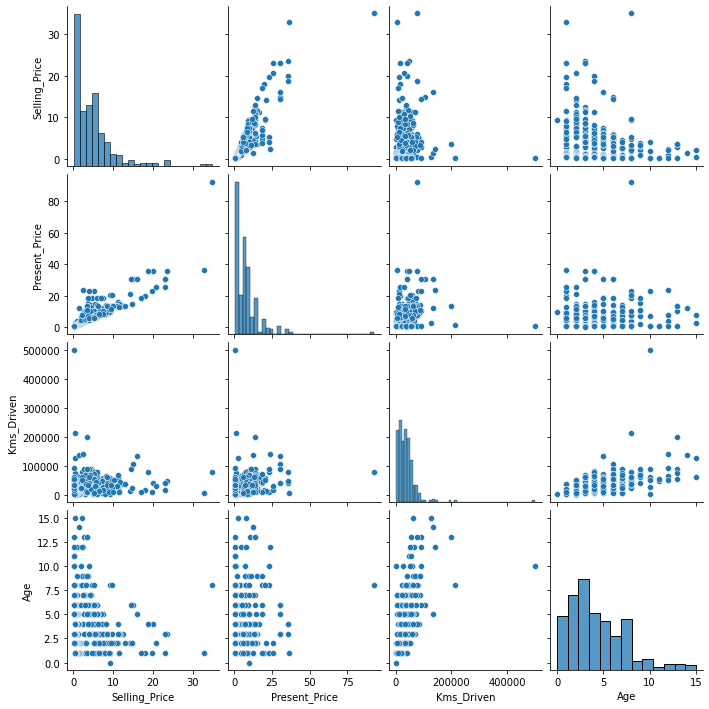

In [15]:
# Data visualiztion
sns.pairplot(data)

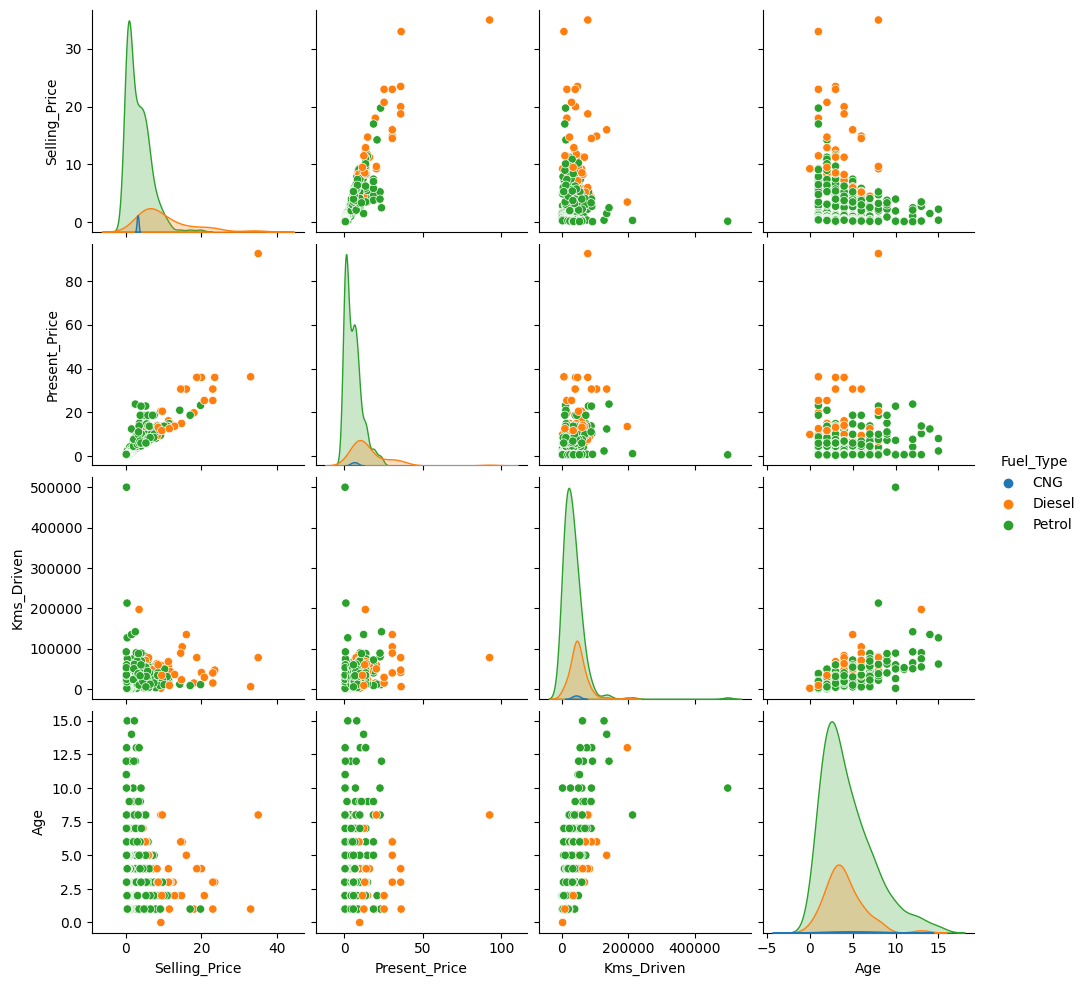

In [16]:
# Data visualiztion with category variable
sns.pairplot(data, hue = "Fuel_Type")

### Dealing with Category Varianles

### Dummy Variable

In [17]:
# Get the dummy variables
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.head()

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,4,0,1,0,1
1,4.75,9.54,43000,5,1,0,0,1
2,7.25,9.85,6900,1,0,1,0,1
3,2.85,4.15,5200,7,0,1,0,1
4,4.60,6.87,42450,4,1,0,0,1


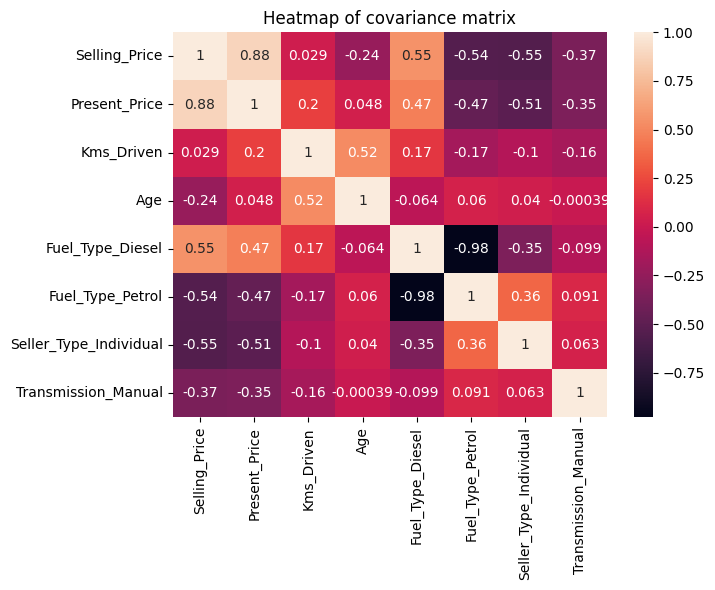

In [18]:
# Plotting the covariance matrix

fig=plt.figure(figsize=(7,5))
sns.heatmap(data_dummy.corr(), annot = True, yticklabels = True,)
plt.title("Heatmap of covariance matrix")
plt.show()
# you can learn more about ploting heatmap using seaborn via:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# or:
# https://zhuanlan.zhihu.com/p/165426873

In [19]:
# Preparing the training and testing data 
X = data_dummy.drop("Selling_Price", axis=1)
y = data_dummy["Selling_Price"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=3020)
print("train size: ", train_X.shape[0])
print("test size: ", test_X.shape[0])

train size:  210
test size:  91


In [20]:
# Fiting the Linear Regression model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train_X, train_y)

# Printing of results
print("intercept_: \n", linear_reg.intercept_)
print("coef_: \n", linear_reg.coef_)
print("Training R_squared: ", linear_reg.score(train_X, train_y)) # R_squared on training data
print("Test R_squared: ", linear_reg.score(test_X, test_y)) # R_squared on test data
 

intercept_: 
 3.4517511459443835
coef_: 
 [ 4.62193327e-01 -5.68975827e-06 -4.28434697e-01  2.10517744e+00
  3.68090821e-01 -9.87952308e-01 -7.95608083e-01]
Training R_squared:  0.8748331472158537
Test R_squared:  0.8831237201148042


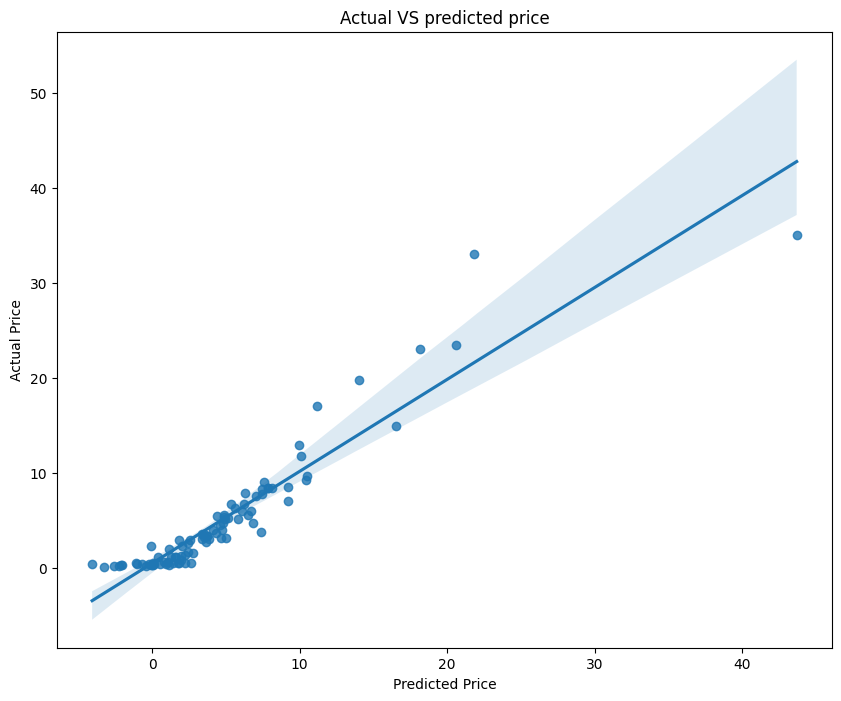

In [21]:
# Plot Actual values vs fitted values

# Make predictions given the fitted model:
pred_y = linear_reg.predict(test_X)

fig=plt.figure(figsize=(10,8))
sns.regplot(x=pred_y, y=test_y)
plt.xlabel ('Predicted Price')
plt.ylabel ('Actual Price')
plt.title('Actual VS predicted price')
plt.show()

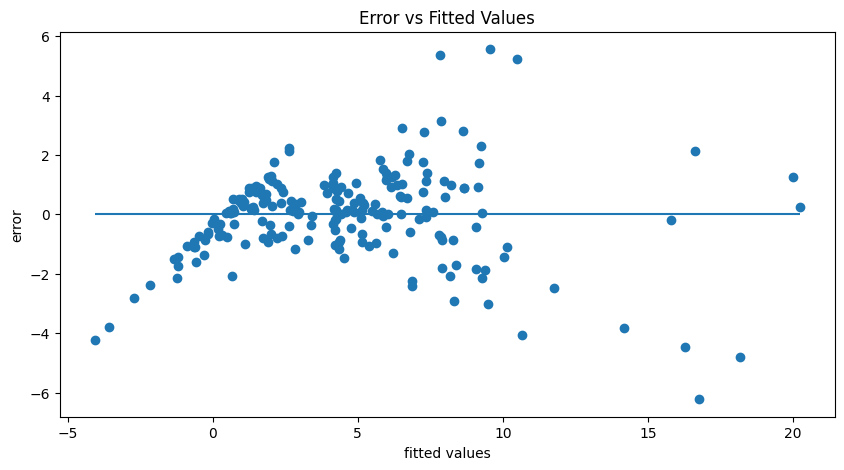

In [22]:
# Plot error vs fitted values
fig=plt.figure(figsize=(10,5))
plt.scatter(linear_reg.predict(train_X), linear_reg.predict(train_X)-train_y)
plt.hlines(0, min(linear_reg.predict(train_X)), max(linear_reg.predict(train_X)))
plt.xlabel ('fitted values')
plt.ylabel ('error')
plt.title('Error vs Fitted Values')
plt.show()

### One-Hot_Encoder
ColumnTransformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

OneHotEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [23]:
#One-hot-encoder convert category variable column into one-hot matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3,4])], remainder='passthrough')
X = data.drop("Selling_Price", axis=1)    # drop the dependent variable part
y = data["Selling_Price"]
X_encode = np.array(ct.fit_transform(X))  # not need np.array

In [24]:
# Preparing the training and testing data 
train_X, test_X, train_y, test_y = train_test_split(X_encode, y, test_size=0.3, random_state=3020)
print("train size: ", train_X.shape[0])
print("test size: ", test_X.shape[0])

train size:  210
test size:  91


In [25]:
# Fiting the Linear Regression model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train_X, train_y)

# Printing of results
print("intercept_: \n", linear_reg.intercept_)
print("coef_: \n", linear_reg.coef_)
print("Training R_squared: ", linear_reg.score(train_X, train_y)) # R_squared on training data
print("Test R_squared: ", linear_reg.score(test_X, test_y)) # R_squared on test data

intercept_: 
 3.3843937024732353
coef_: 
 [-8.24422752e-01  1.28075468e+00 -4.56331931e-01  4.93976154e-01
 -4.93976154e-01  3.97804042e-01 -3.97804042e-01  4.62193327e-01
 -5.68975827e-06 -4.28434697e-01]
Training R_squared:  0.8748331472158537
Test R_squared:  0.883123720114808


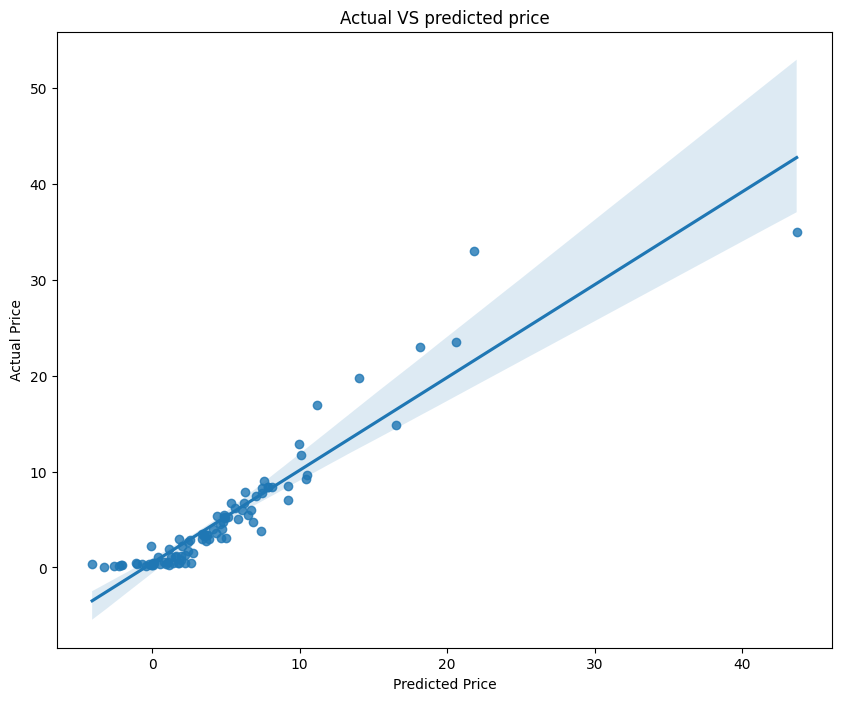

In [26]:
# Plot Actual values vs fitted values

# Make predictions given the fitted model:
pred_y = linear_reg.predict(test_X)

fig=plt.figure(figsize=(10,8))
sns.regplot(x=pred_y, y=test_y)
plt.xlabel ('Predicted Price')
plt.ylabel ('Actual Price')
plt.title('Actual VS predicted price')
plt.show()

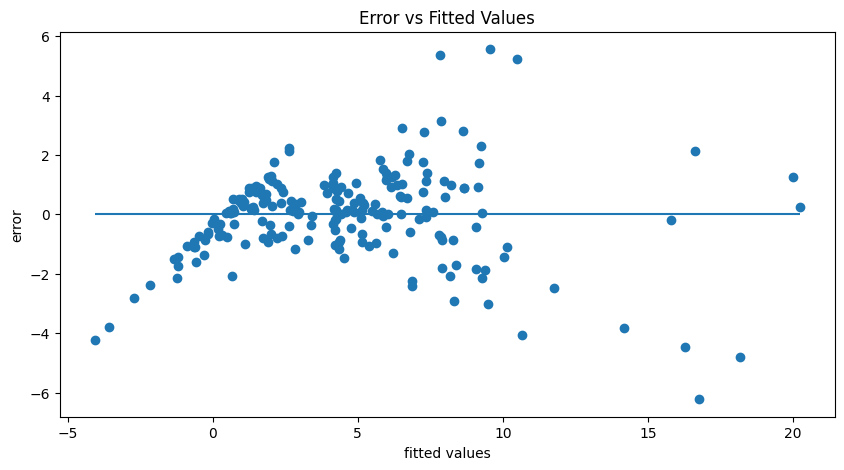

In [27]:
# Plot error vs fitted values
fig=plt.figure(figsize=(10,5))
plt.scatter(linear_reg.predict(train_X), linear_reg.predict(train_X)-train_y)
plt.hlines(0, min(linear_reg.predict(train_X)), max(linear_reg.predict(train_X)))
plt.xlabel ('fitted values')
plt.ylabel ('error')
plt.title('Error vs Fitted Values')
plt.show()

### Thank You for Your Attention!!!